##Máquina de soporte vectorial para clasificación

###Kernel RBF y usando una covariable

####10% de datos de entrenamiento

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.utils import column_or_1d
%matplotlib inline

#### 1) Se cargan el set de datos y se asigna el porcentaje de entrenamiento

In [6]:
data = pd.read_csv("df_data2.csv")
print(data.head())
print(data.describe())

              amount     bin status  fraud  BankFrequency  AmountCategory  \
0  amount below 2000  491283   paid      0            183               4   
1   amount below 500  455255   paid      0            194               1   
2  amount below 1500  407458   paid      0              6               3   
3   amount below 500  455511   paid      0             64               1   
4  amount below 1000  370782   paid      0             10               2   

   AmountMark  
0        1750  
1         250  
2        1250  
3         250  
4         750  
                 bin         fraud  BankFrequency  AmountCategory  \
count   11122.000000  11122.000000   11122.000000    11122.000000   
mean   487255.105107      0.154828     280.208236        2.220464   
std     54447.849867      0.361757     301.820646        1.777312   
min    370700.000000      0.000000       1.000000        1.000000   
25%    441028.000000      0.000000      53.000000        1.000000   
50%    491375.000000      0

In [7]:
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(data[["AmountMark"]],data[["fraud"]],train_size=0.1)
print len(X_train), len(X_test)

1112 10010


In [8]:
print(X_train.head())

       AmountMark
7454          750
5156          250
10660         250
8177          250
9392          750


#### 2) Transformación de los datos

In [9]:
X_train1=np.asarray(X_train['AmountMark'])

In [10]:
Y_train2 = column_or_1d(Y_train)
print(Y_train.head())
print(Y_train2[0:5])

       fraud
7454       0
5156       1
10660      0
8177       0
9392       0
[0 1 0 0 0]


#### 3) Se define el kernel para el SVM y se ajusta el modelo

In [11]:
clf = svm.SVC(kernel='rbf', C=1e3, gamma=0.1)
y_rbf =clf.fit(X_train, Y_train2).predict(X_train)

#### 4) Visualización de clasificación multidimensional con SVM kernel lineal

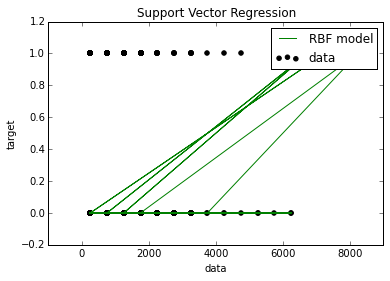

In [12]:
plt.scatter(X_train, Y_train2, c='k', label='data')
plt.hold('on')
plt.plot(X_train, y_rbf, c='g', label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()